In [56]:
import numpy as np
from scipy import *
import os
import h5py
import keras as k
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.models import Sequential
from keras.losses import categorical_crossentropy
from sklearn.utils import shuffle
from keras.utils import np_utils
import matplotlib.pyplot as plt
import pickle

In [57]:
file = open(r"C:\Users\fires\Desktop\CSIRO\thursday\HOG\images.dat",'rb')
images = pickle.load(file)
file.close()

file = open(r"C:\Users\fires\Desktop\CSIRO\thursday\HOG\labels.dat",'rb')
labels = pickle.load(file)
file.close()

In [58]:
images = images.reshape(-1, 89*89)

In [74]:
np.mean(images)

1.5469032271432861e-05

In [59]:
# balance classes
def bal_classes(images, labels):
    class1 = []
    class2 = []
    
    for i in range(labels.shape[0]):
        if labels[i] == False:
            class1.append(i)
    
    for i in range(labels.shape[0]):
        if labels[i] == True:
            class2.append(i)
    
    if len(class2) > len(class1):
        class2 = np.asarray(class2[:len(class1)])
    
    elif len(class2) < len(class1):
        class1 = np.asarray(class1[:len(class2)])
        
    images1 = images[class1, :] 
    images2 = images[class2, :]
    labels1 = labels[class1,]
    labels2 = labels[class2,]
    
    print (labels2.shape)
    
    images_st = np.vstack((images1, images2))
    labels_st =  np.concatenate((labels1, labels2), axis=0)              
        
    images_s, labels_s = shuffle(np.asarray(images_st), np.asarray(labels_st), random_state = 0)    
        
    return images_s, labels_s

In [60]:
images_p, labels_p = bal_classes(np.asarray(images), np.asarray(labels))

(1216,)


In [61]:
def format_data(images, labels, ratio = 0.5):
    split = round(ratio*images.shape[0])
    
    train_x = images[ :split, :]
    test_x = images[split:, :]
    train_y = labels[ :split]
    test_y = labels[split:]
    
    return train_x, test_x, train_y, test_y


train_x, test_x, train_y, test_y = format_data(images_p, labels_p)

In [62]:
# Convert class vectors to binary class matrices
train_y = np_utils.to_categorical(train_y, 2)
test_y = np_utils.to_categorical(test_y, 2)

In [63]:
# Define model attributes
batch_size = 20
nb_classes = output_dims = 2
nb_epoch = 1000
input_dim = 7921

model = Sequential()
model.add(Dense(output_dims, input_dim = input_dim, activation='sigmoid'))


In [66]:
model.compile(optimizer="adam", loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_x, train_y, epochs=nb_epoch, batch_size=batch_size, 
          validation_data=(test_x, test_y))

Train on 1216 samples, validate on 1216 samples
Epoch 1/1000
1216/1216 [==============================] - 1s 705us/step - loss: 0.6611 - acc: 0.6349 - val_loss: 0.6723 - val_acc: 0.5921
Epoch 2/1000
1216/1216 [==============================] - 0s 385us/step - loss: 0.6603 - acc: 0.6365 - val_loss: 0.6719 - val_acc: 0.5905
Epoch 3/1000
1216/1216 [==============================] - 0s 355us/step - loss: 0.6595 - acc: 0.6382 - val_loss: 0.6714 - val_acc: 0.5995
Epoch 4/1000
1216/1216 [==============================] - 0s 317us/step - loss: 0.6588 - acc: 0.6456 - val_loss: 0.6709 - val_acc: 0.6028
Epoch 5/1000
1216/1216 [==============================] - 0s 329us/step - loss: 0.6581 - acc: 0.6521 - val_loss: 0.6704 - val_acc: 0.6053
Epoch 6/1000
1216/1216 [==============================] - 0s 332us/step - loss: 0.6574 - acc: 0.6488 - val_loss: 0.6700 - val_acc: 0.6036
Epoch 7/1000
1216/1216 [==============================] - 0s 374us/step - loss: 0.6566 - acc: 0.6505 - val_loss: 0.6695 - va

1216/1216 [==============================] - 0s 408us/step - loss: 0.6217 - acc: 0.6982 - val_loss: 0.6504 - val_acc: 0.6332
Epoch 60/1000
1216/1216 [==============================] - 0s 332us/step - loss: 0.6211 - acc: 0.7015 - val_loss: 0.6501 - val_acc: 0.6340
Epoch 61/1000
1216/1216 [==============================] - 0s 335us/step - loss: 0.6205 - acc: 0.7048 - val_loss: 0.6497 - val_acc: 0.6349
Epoch 62/1000
1216/1216 [==============================] - 0s 392us/step - loss: 0.6198 - acc: 0.7048 - val_loss: 0.6494 - val_acc: 0.6340
Epoch 63/1000
1216/1216 [==============================] - 0s 364us/step - loss: 0.6192 - acc: 0.7048 - val_loss: 0.6491 - val_acc: 0.6349
Epoch 64/1000
1216/1216 [==============================] - 1s 442us/step - loss: 0.6185 - acc: 0.7048 - val_loss: 0.6488 - val_acc: 0.6340
Epoch 65/1000
1216/1216 [==============================] - 1s 477us/step - loss: 0.6180 - acc: 0.7081 - val_loss: 0.6485 - val_acc: 0.6357
Epoch 66/1000
1216/1216 [================

Epoch 118/1000
1216/1216 [==============================] - 1s 522us/step - loss: 0.5868 - acc: 0.7401 - val_loss: 0.6348 - val_acc: 0.6538
Epoch 119/1000
1216/1216 [==============================] - 1s 495us/step - loss: 0.5862 - acc: 0.7442 - val_loss: 0.6345 - val_acc: 0.6554
Epoch 120/1000
1216/1216 [==============================] - 1s 478us/step - loss: 0.5857 - acc: 0.7467 - val_loss: 0.6343 - val_acc: 0.6562
Epoch 121/1000
1216/1216 [==============================] - 1s 476us/step - loss: 0.5851 - acc: 0.7434 - val_loss: 0.6342 - val_acc: 0.6538
Epoch 122/1000
1216/1216 [==============================] - 0s 345us/step - loss: 0.5846 - acc: 0.7426 - val_loss: 0.6340 - val_acc: 0.6538
Epoch 123/1000
1216/1216 [==============================] - 1s 432us/step - loss: 0.5840 - acc: 0.7451 - val_loss: 0.6337 - val_acc: 0.6554
Epoch 124/1000
1216/1216 [==============================] - 1s 415us/step - loss: 0.5835 - acc: 0.7451 - val_loss: 0.6334 - val_acc: 0.6579
Epoch 125/1000
1216/

1216/1216 [==============================] - 0s 389us/step - loss: 0.5571 - acc: 0.7755 - val_loss: 0.6243 - val_acc: 0.6661
Epoch 177/1000
1216/1216 [==============================] - 0s 308us/step - loss: 0.5566 - acc: 0.7730 - val_loss: 0.6242 - val_acc: 0.6653
Epoch 178/1000
1216/1216 [==============================] - 0s 377us/step - loss: 0.5562 - acc: 0.7788 - val_loss: 0.6240 - val_acc: 0.6702
Epoch 179/1000
1216/1216 [==============================] - 0s 394us/step - loss: 0.5557 - acc: 0.7771 - val_loss: 0.6239 - val_acc: 0.6694
Epoch 180/1000
1216/1216 [==============================] - 0s 344us/step - loss: 0.5553 - acc: 0.7747 - val_loss: 0.6239 - val_acc: 0.6653
Epoch 181/1000
1216/1216 [==============================] - 0s 322us/step - loss: 0.5548 - acc: 0.7780 - val_loss: 0.6236 - val_acc: 0.6694
Epoch 182/1000
1216/1216 [==============================] - 0s 347us/step - loss: 0.5543 - acc: 0.7722 - val_loss: 0.6236 - val_acc: 0.6661
Epoch 183/1000
1216/1216 [=========

1216/1216 [==============================] - 0s 324us/step - loss: 0.5315 - acc: 0.7985 - val_loss: 0.6174 - val_acc: 0.6735
Epoch 235/1000
1216/1216 [==============================] - 0s 309us/step - loss: 0.5310 - acc: 0.8026 - val_loss: 0.6172 - val_acc: 0.6760
Epoch 236/1000
1216/1216 [==============================] - 0s 311us/step - loss: 0.5306 - acc: 0.8035 - val_loss: 0.6170 - val_acc: 0.6776
Epoch 237/1000
1216/1216 [==============================] - 0s 329us/step - loss: 0.5302 - acc: 0.8018 - val_loss: 0.6170 - val_acc: 0.6760
Epoch 238/1000
1216/1216 [==============================] - 1s 491us/step - loss: 0.5298 - acc: 0.8018 - val_loss: 0.6170 - val_acc: 0.6760
Epoch 239/1000
1216/1216 [==============================] - 0s 331us/step - loss: 0.5294 - acc: 0.8092 - val_loss: 0.6167 - val_acc: 0.6776
Epoch 240/1000
1216/1216 [==============================] - 0s 308us/step - loss: 0.5289 - acc: 0.8084 - val_loss: 0.6167 - val_acc: 0.6776
Epoch 241/1000
1216/1216 [=========

1216/1216 [==============================] - 0s 321us/step - loss: 0.5087 - acc: 0.8298 - val_loss: 0.6126 - val_acc: 0.6850
Epoch 293/1000
1216/1216 [==============================] - 0s 304us/step - loss: 0.5083 - acc: 0.8232 - val_loss: 0.6126 - val_acc: 0.6817
Epoch 294/1000
1216/1216 [==============================] - 0s 316us/step - loss: 0.5079 - acc: 0.8281 - val_loss: 0.6125 - val_acc: 0.6842
Epoch 295/1000
1216/1216 [==============================] - 0s 312us/step - loss: 0.5076 - acc: 0.8240 - val_loss: 0.6126 - val_acc: 0.6809
Epoch 296/1000
1216/1216 [==============================] - 0s 339us/step - loss: 0.5072 - acc: 0.8273 - val_loss: 0.6123 - val_acc: 0.6859
Epoch 297/1000
1216/1216 [==============================] - 0s 364us/step - loss: 0.5069 - acc: 0.8257 - val_loss: 0.6123 - val_acc: 0.6842
Epoch 298/1000
1216/1216 [==============================] - 0s 359us/step - loss: 0.5064 - acc: 0.8281 - val_loss: 0.6122 - val_acc: 0.6867
Epoch 299/1000
1216/1216 [=========

1216/1216 [==============================] - 0s 307us/step - loss: 0.4881 - acc: 0.8487 - val_loss: 0.6094 - val_acc: 0.6908
Epoch 351/1000
1216/1216 [==============================] - 0s 310us/step - loss: 0.4878 - acc: 0.8503 - val_loss: 0.6094 - val_acc: 0.6924
Epoch 352/1000
1216/1216 [==============================] - 0s 312us/step - loss: 0.4874 - acc: 0.8470 - val_loss: 0.6095 - val_acc: 0.6900
Epoch 353/1000
1216/1216 [==============================] - 0s 309us/step - loss: 0.4871 - acc: 0.8470 - val_loss: 0.6094 - val_acc: 0.6900
Epoch 354/1000
1216/1216 [==============================] - 0s 313us/step - loss: 0.4867 - acc: 0.8495 - val_loss: 0.6094 - val_acc: 0.6900
Epoch 355/1000
1216/1216 [==============================] - 0s 321us/step - loss: 0.4864 - acc: 0.8495 - val_loss: 0.6093 - val_acc: 0.6900
Epoch 356/1000
1216/1216 [==============================] - 0s 312us/step - loss: 0.4861 - acc: 0.8520 - val_loss: 0.6092 - val_acc: 0.6924
Epoch 357/1000
1216/1216 [=========

1216/1216 [==============================] - 1s 488us/step - loss: 0.4694 - acc: 0.8668 - val_loss: 0.6075 - val_acc: 0.6933
Epoch 409/1000
1216/1216 [==============================] - 1s 429us/step - loss: 0.4691 - acc: 0.8668 - val_loss: 0.6076 - val_acc: 0.6908
Epoch 410/1000
1216/1216 [==============================] - 0s 350us/step - loss: 0.4687 - acc: 0.8676 - val_loss: 0.6076 - val_acc: 0.6908
Epoch 411/1000
1216/1216 [==============================] - 0s 389us/step - loss: 0.4684 - acc: 0.8684 - val_loss: 0.6075 - val_acc: 0.6933
Epoch 412/1000
1216/1216 [==============================] - 1s 464us/step - loss: 0.4681 - acc: 0.8676 - val_loss: 0.6075 - val_acc: 0.6933
Epoch 413/1000
1216/1216 [==============================] - 1s 432us/step - loss: 0.4678 - acc: 0.8701 - val_loss: 0.6074 - val_acc: 0.6941
Epoch 414/1000
1216/1216 [==============================] - 1s 461us/step - loss: 0.4675 - acc: 0.8668 - val_loss: 0.6074 - val_acc: 0.6933
Epoch 415/1000
1216/1216 [=========

1216/1216 [==============================] - 0s 402us/step - loss: 0.4521 - acc: 0.8799 - val_loss: 0.6063 - val_acc: 0.6982
Epoch 467/1000
1216/1216 [==============================] - 0s 408us/step - loss: 0.4518 - acc: 0.8750 - val_loss: 0.6065 - val_acc: 0.6982
Epoch 468/1000
1216/1216 [==============================] - 1s 432us/step - loss: 0.4516 - acc: 0.8791 - val_loss: 0.6063 - val_acc: 0.6965
Epoch 469/1000
1216/1216 [==============================] - 0s 411us/step - loss: 0.4512 - acc: 0.8783 - val_loss: 0.6064 - val_acc: 0.6998
Epoch 470/1000
1216/1216 [==============================] - 0s 402us/step - loss: 0.4510 - acc: 0.8766 - val_loss: 0.6063 - val_acc: 0.6982
Epoch 471/1000
1216/1216 [==============================] - 1s 437us/step - loss: 0.4506 - acc: 0.8824 - val_loss: 0.6063 - val_acc: 0.6990
Epoch 472/1000
1216/1216 [==============================] - 1s 446us/step - loss: 0.4504 - acc: 0.8775 - val_loss: 0.6063 - val_acc: 0.6990
Epoch 473/1000
1216/1216 [=========

1216/1216 [==============================] - 0s 310us/step - loss: 0.4361 - acc: 0.8882 - val_loss: 0.6060 - val_acc: 0.7039
Epoch 525/1000
1216/1216 [==============================] - 0s 312us/step - loss: 0.4358 - acc: 0.8914 - val_loss: 0.6058 - val_acc: 0.7056
Epoch 526/1000
1216/1216 [==============================] - 0s 301us/step - loss: 0.4355 - acc: 0.8923 - val_loss: 0.6058 - val_acc: 0.7048
Epoch 527/1000
1216/1216 [==============================] - 0s 312us/step - loss: 0.4352 - acc: 0.8906 - val_loss: 0.6058 - val_acc: 0.7048
Epoch 528/1000
1216/1216 [==============================] - 0s 311us/step - loss: 0.4350 - acc: 0.8931 - val_loss: 0.6059 - val_acc: 0.7056
Epoch 529/1000
1216/1216 [==============================] - 0s 296us/step - loss: 0.4347 - acc: 0.8923 - val_loss: 0.6058 - val_acc: 0.7056
Epoch 530/1000
1216/1216 [==============================] - 0s 315us/step - loss: 0.4344 - acc: 0.8923 - val_loss: 0.6059 - val_acc: 0.7048
Epoch 531/1000
1216/1216 [=========

1216/1216 [==============================] - 0s 399us/step - loss: 0.4211 - acc: 0.9038 - val_loss: 0.6058 - val_acc: 0.7089
Epoch 583/1000
1216/1216 [==============================] - 0s 328us/step - loss: 0.4208 - acc: 0.9038 - val_loss: 0.6057 - val_acc: 0.7089
Epoch 584/1000
1216/1216 [==============================] - 0s 339us/step - loss: 0.4205 - acc: 0.9038 - val_loss: 0.6057 - val_acc: 0.7089
Epoch 585/1000
1216/1216 [==============================] - 0s 351us/step - loss: 0.4203 - acc: 0.9038 - val_loss: 0.6057 - val_acc: 0.7097
Epoch 586/1000
1216/1216 [==============================] - 0s 337us/step - loss: 0.4200 - acc: 0.9054 - val_loss: 0.6056 - val_acc: 0.7056
Epoch 587/1000
1216/1216 [==============================] - 0s 386us/step - loss: 0.4199 - acc: 0.9005 - val_loss: 0.6058 - val_acc: 0.7097
Epoch 588/1000
1216/1216 [==============================] - 0s 363us/step - loss: 0.4195 - acc: 0.9071 - val_loss: 0.6057 - val_acc: 0.7081
Epoch 589/1000
1216/1216 [=========

1216/1216 [==============================] - 1s 479us/step - loss: 0.4069 - acc: 0.9153 - val_loss: 0.6061 - val_acc: 0.7056
Epoch 641/1000
1216/1216 [==============================] - 1s 508us/step - loss: 0.4066 - acc: 0.9137 - val_loss: 0.6061 - val_acc: 0.7072
Epoch 642/1000
1216/1216 [==============================] - 1s 543us/step - loss: 0.4065 - acc: 0.9104 - val_loss: 0.6061 - val_acc: 0.7072
Epoch 643/1000
1216/1216 [==============================] - 1s 478us/step - loss: 0.4062 - acc: 0.9145 - val_loss: 0.6061 - val_acc: 0.7081
Epoch 644/1000
1216/1216 [==============================] - 1s 444us/step - loss: 0.4059 - acc: 0.9145 - val_loss: 0.6061 - val_acc: 0.7081
Epoch 645/1000
1216/1216 [==============================] - 0s 345us/step - loss: 0.4057 - acc: 0.9137 - val_loss: 0.6060 - val_acc: 0.7081
Epoch 646/1000
1216/1216 [==============================] - 0s 399us/step - loss: 0.4055 - acc: 0.9137 - val_loss: 0.6061 - val_acc: 0.7081
Epoch 647/1000
1216/1216 [=========

1216/1216 [==============================] - 0s 333us/step - loss: 0.3935 - acc: 0.9252 - val_loss: 0.6067 - val_acc: 0.7072
Epoch 699/1000
1216/1216 [==============================] - 0s 364us/step - loss: 0.3933 - acc: 0.9260 - val_loss: 0.6066 - val_acc: 0.7097
Epoch 700/1000
1216/1216 [==============================] - 0s 345us/step - loss: 0.3931 - acc: 0.9243 - val_loss: 0.6067 - val_acc: 0.7072
Epoch 701/1000
1216/1216 [==============================] - 0s 340us/step - loss: 0.3929 - acc: 0.9268 - val_loss: 0.6066 - val_acc: 0.7097
Epoch 702/1000
1216/1216 [==============================] - 0s 345us/step - loss: 0.3927 - acc: 0.9252 - val_loss: 0.6067 - val_acc: 0.7072
Epoch 703/1000
1216/1216 [==============================] - 0s 394us/step - loss: 0.3924 - acc: 0.9260 - val_loss: 0.6067 - val_acc: 0.7072
Epoch 704/1000
1216/1216 [==============================] - 0s 400us/step - loss: 0.3922 - acc: 0.9268 - val_loss: 0.6067 - val_acc: 0.7089
Epoch 705/1000
1216/1216 [=========

1216/1216 [==============================] - 0s 334us/step - loss: 0.3809 - acc: 0.9301 - val_loss: 0.6076 - val_acc: 0.7097
Epoch 757/1000
1216/1216 [==============================] - 0s 303us/step - loss: 0.3807 - acc: 0.9309 - val_loss: 0.6076 - val_acc: 0.7097
Epoch 758/1000
1216/1216 [==============================] - 0s 345us/step - loss: 0.3805 - acc: 0.9309 - val_loss: 0.6075 - val_acc: 0.7097
Epoch 759/1000
1216/1216 [==============================] - 0s 307us/step - loss: 0.3802 - acc: 0.9309 - val_loss: 0.6076 - val_acc: 0.7097
Epoch 760/1000
1216/1216 [==============================] - 0s 323us/step - loss: 0.3800 - acc: 0.9309 - val_loss: 0.6076 - val_acc: 0.7097
Epoch 761/1000
1216/1216 [==============================] - 0s 319us/step - loss: 0.3798 - acc: 0.9309 - val_loss: 0.6078 - val_acc: 0.7081
Epoch 762/1000
1216/1216 [==============================] - 0s 308us/step - loss: 0.3796 - acc: 0.9309 - val_loss: 0.6078 - val_acc: 0.7081
Epoch 763/1000
1216/1216 [=========

1216/1216 [==============================] - 0s 310us/step - loss: 0.3688 - acc: 0.9375 - val_loss: 0.6088 - val_acc: 0.7089
Epoch 815/1000
1216/1216 [==============================] - 0s 317us/step - loss: 0.3686 - acc: 0.9375 - val_loss: 0.6088 - val_acc: 0.7089
Epoch 816/1000
1216/1216 [==============================] - 0s 325us/step - loss: 0.3684 - acc: 0.9375 - val_loss: 0.6089 - val_acc: 0.7089
Epoch 817/1000
1216/1216 [==============================] - 0s 305us/step - loss: 0.3682 - acc: 0.9375 - val_loss: 0.6088 - val_acc: 0.7081
Epoch 818/1000
1216/1216 [==============================] - 0s 323us/step - loss: 0.3680 - acc: 0.9383 - val_loss: 0.6087 - val_acc: 0.7064
Epoch 819/1000
1216/1216 [==============================] - 0s 306us/step - loss: 0.3678 - acc: 0.9359 - val_loss: 0.6088 - val_acc: 0.7081
Epoch 820/1000
1216/1216 [==============================] - 0s 324us/step - loss: 0.3676 - acc: 0.9375 - val_loss: 0.6088 - val_acc: 0.7064
Epoch 821/1000
1216/1216 [=========

1216/1216 [==============================] - 1s 445us/step - loss: 0.3573 - acc: 0.9400 - val_loss: 0.6101 - val_acc: 0.7056
Epoch 873/1000
1216/1216 [==============================] - 1s 435us/step - loss: 0.3571 - acc: 0.9408 - val_loss: 0.6100 - val_acc: 0.7064
Epoch 874/1000
1216/1216 [==============================] - 0s 394us/step - loss: 0.3569 - acc: 0.9416 - val_loss: 0.6102 - val_acc: 0.7064
Epoch 875/1000
1216/1216 [==============================] - 0s 384us/step - loss: 0.3568 - acc: 0.9416 - val_loss: 0.6101 - val_acc: 0.7064
Epoch 876/1000
1216/1216 [==============================] - 0s 391us/step - loss: 0.3565 - acc: 0.9408 - val_loss: 0.6101 - val_acc: 0.7064
Epoch 877/1000
1216/1216 [==============================] - 0s 395us/step - loss: 0.3564 - acc: 0.9408 - val_loss: 0.6102 - val_acc: 0.7056
Epoch 878/1000
1216/1216 [==============================] - 0s 386us/step - loss: 0.3562 - acc: 0.9433 - val_loss: 0.6100 - val_acc: 0.7064
Epoch 879/1000
1216/1216 [=========

1216/1216 [==============================] - 0s 372us/step - loss: 0.3463 - acc: 0.9449 - val_loss: 0.6115 - val_acc: 0.7064
Epoch 931/1000
1216/1216 [==============================] - 0s 376us/step - loss: 0.3461 - acc: 0.9441 - val_loss: 0.6116 - val_acc: 0.7072
Epoch 932/1000
1216/1216 [==============================] - 0s 357us/step - loss: 0.3459 - acc: 0.9449 - val_loss: 0.6116 - val_acc: 0.7064
Epoch 933/1000
1216/1216 [==============================] - 0s 409us/step - loss: 0.3457 - acc: 0.9449 - val_loss: 0.6116 - val_acc: 0.7064
Epoch 934/1000
1216/1216 [==============================] - 1s 427us/step - loss: 0.3455 - acc: 0.9465 - val_loss: 0.6116 - val_acc: 0.7064
Epoch 935/1000
1216/1216 [==============================] - 0s 371us/step - loss: 0.3453 - acc: 0.9449 - val_loss: 0.6117 - val_acc: 0.7064
Epoch 936/1000
1216/1216 [==============================] - 1s 450us/step - loss: 0.3452 - acc: 0.9474 - val_loss: 0.6117 - val_acc: 0.7064
Epoch 937/1000
1216/1216 [=========

1216/1216 [==============================] - 0s 333us/step - loss: 0.3357 - acc: 0.9507 - val_loss: 0.6133 - val_acc: 0.7072
Epoch 989/1000
1216/1216 [==============================] - 0s 317us/step - loss: 0.3356 - acc: 0.9523 - val_loss: 0.6131 - val_acc: 0.7081
Epoch 990/1000
1216/1216 [==============================] - 0s 345us/step - loss: 0.3354 - acc: 0.9523 - val_loss: 0.6134 - val_acc: 0.7072
Epoch 991/1000
1216/1216 [==============================] - 0s 327us/step - loss: 0.3352 - acc: 0.9523 - val_loss: 0.6132 - val_acc: 0.7081
Epoch 992/1000
1216/1216 [==============================] - 0s 327us/step - loss: 0.3351 - acc: 0.9498 - val_loss: 0.6135 - val_acc: 0.7072
Epoch 993/1000
1216/1216 [==============================] - 0s 313us/step - loss: 0.3348 - acc: 0.9523 - val_loss: 0.6133 - val_acc: 0.7072
Epoch 994/1000
1216/1216 [==============================] - 0s 331us/step - loss: 0.3348 - acc: 0.9515 - val_loss: 0.6132 - val_acc: 0.7081
Epoch 995/1000
1216/1216 [=========

In [67]:
# serialize model to JSON
model_json = model.to_json()
with open("LR_keras.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("LR_keras.h5")
print("Saved model to disk")

Saved model to disk


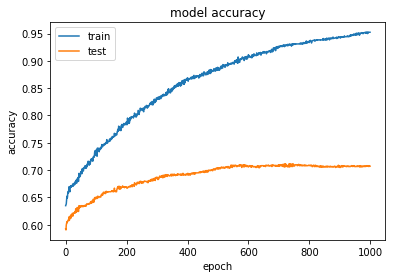

In [68]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

0


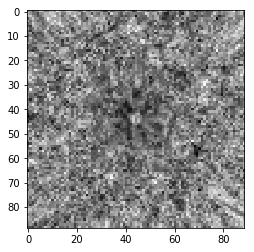

1


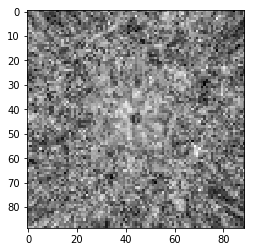

Dense to output layer weights [-3.75771165 -4.24314451]


In [70]:
for layer in model.layers:
    weights = layer.get_weights()

wt = np.reshape(weights[0], (89, 89, 2))
    
for n in range(0, wt.shape[2]):
   plt.imshow(wt[:,:,n], cmap='gray', shape=(135, 135))
   print (n)
   plt.show()

print ("Dense to output layer weights " + str(weights[1]))